In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datetime import datetime
import os
import warnings
warnings.filterwarnings('ignore')


In [62]:
df_customer = pd.read_csv("/content/Customers.csv")
df_product = pd.read_csv("/content/Products.csv")
df_transaction = pd.read_csv("/content/Transactions.csv")


In [63]:
df_customer.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [64]:
# Check for missing values
print(df_customer.isnull().sum())

# Unique values in each column
print(df_customer.nunique())

# Summary statistics
print(df_customer.describe())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
CustomerID      200
CustomerName    200
Region            4
SignupDate      179
dtype: int64
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [65]:
# Convert the SignupDate column to datetime
df_customer['SignupDate'] = pd.to_datetime(df_customer['SignupDate'])

# Find the date range
start_date = df_customer['SignupDate'].min()
end_date = df_customer['SignupDate'].max()

print(f"The range of dates is from {start_date.date()} to {end_date.date()}.")

The range of dates is from 2022-01-22 to 2024-12-28.


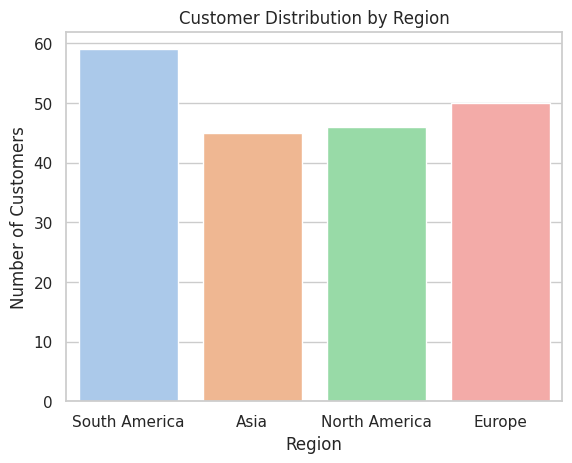

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_customer, x='Region', palette='pastel')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


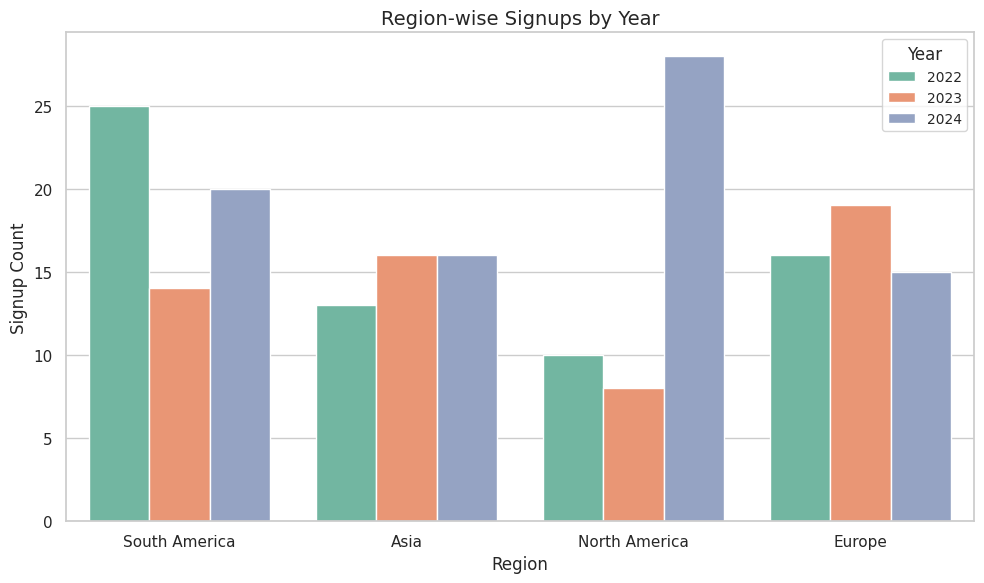

In [68]:
# Convert the SignupDate column to datetime
df_customer['SignupDate'] = pd.to_datetime(df_customer['SignupDate'])

# Extract the year of signup for analysis
df_customer['Year'] = df_customer['SignupDate'].dt.year

# Set the plot style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_customer, x="Region", hue="Year", palette="Set2")

# Adding labels and title
plt.title("Region-wise Signups by Year", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Signup Count", fontsize=12)
plt.legend(title="Year", fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


In [69]:
df_product.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [70]:
# Check for missing values
print(df_product.isnull().sum())

# Unique values in each column
print(df_product.nunique())

# Summary statistics
print(df_product.describe())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
ProductID      100
ProductName     66
Category         4
Price          100
dtype: int64
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


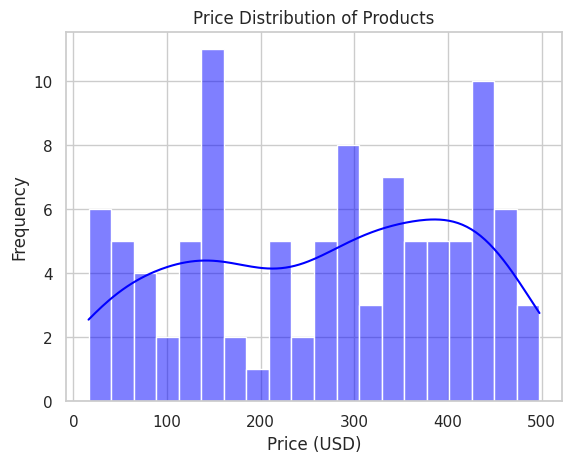

In [71]:
sns.histplot(data=df_product, x='Price', kde=True, color='blue', bins=20)
plt.title('Price Distribution of Products')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


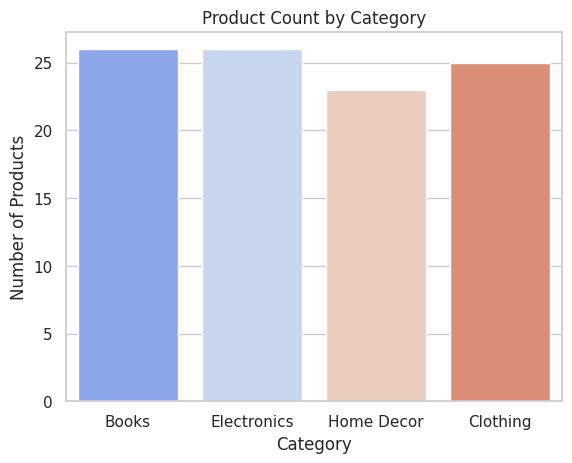

In [72]:
sns.countplot(data=df_product, x='Category', palette='coolwarm')
plt.title('Product Count by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()


In [73]:
df_transaction.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [74]:
# Check for missing values
print(df_transaction.isnull().sum())

# Unique values in each column
print(df_transaction.nunique())

# Summary statistics
print(df_transaction.describe())



TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
TransactionID      1000
CustomerID          199
ProductID           100
TransactionDate    1000
Quantity              4
TotalValue          369
Price               100
dtype: int64
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


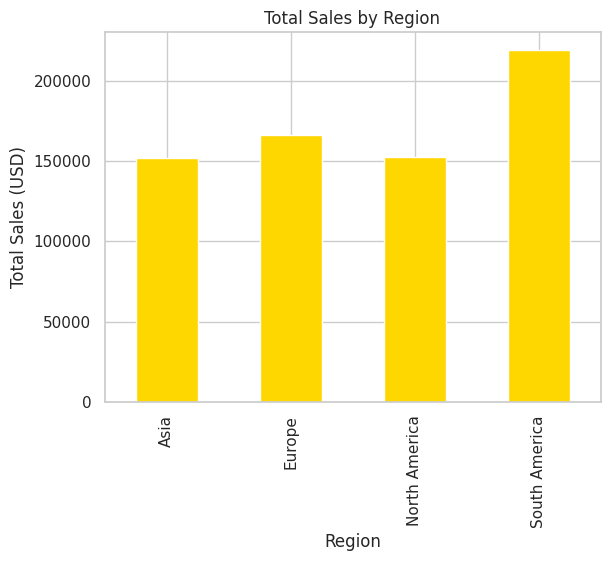

In [75]:
# Merge datasets
merged_data = pd.merge(df_transaction, df_customer, on='CustomerID')
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum()

# Plot sales by region
sales_by_region.plot(kind='bar', color='gold')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.show()


In [89]:
# Merge df1 and df3 on CustomerID
merged_df = pd.merge(df_transaction, df_customer, on="CustomerID", how="inner")

# Merge the result with df2 on ProductID, specifying suffixes
final_df = pd.merge(merged_df, df_product, on="ProductID", how="inner", suffixes=("_transaction", "_product"))

# Reorder the columns as required
final_df = final_df[
    [
        "CustomerID", "CustomerName", "CustomerID", "Region", "SignupDate",
        "TransactionID", "TransactionDate", "ProductID", "ProductName",
        "Category", "Price_product", "TotalValue"
    ]
]

# Rename the column for clarity
final_df.rename(columns={"Price_product": "Price"}, inplace=True)

final_df.to_csv("final.csv")


In [90]:
df_1 = pd.read_csv('/content/final.csv')
# Sort by CustomerID, then TransactionDate
df_2 = df_1.sort_values(['CustomerID', 'TransactionDate'])
# Remove first two columns
df_final = df_2.iloc[:, 2:]
df_final.head()

,CustomerName,CustomerID.1,Region,SignupDate,TransactionID,TransactionDate,ProductID,ProductName,Category,Price,TotalValue
135,Lawrence Carroll,C0001,South America,2022-07-10,T00015,2024-01-19 03:12:55,P054,SoundWave Cookbook,Books,57.30,114.60
546,Lawrence Carroll,C0001,South America,2022-07-10,T00085,2024-04-08 00:01:00,P096,SoundWave Headphones,Electronics,307.47,614.94
724,Lawrence Carroll,C0001,South America,2022-07-10,T00445,2024-05-07 03:11:44,P083,ActiveWear Smartwatch,Electronics,455.72,911.44
442,Lawrence Carroll,C0001,South America,2022-07-10,T00932,2024-09-17 09:01:18,P022,HomeSense Wall Art,Home Decor,137.54,412.62
776,Lawrence Carroll,C0001,South America,2022-07-10,T00436,2024-11-02 17:04:16,P029,TechPro Headphones,Electronics,433.64,1300.92


In [91]:
df_final.to_csv('final.csv')

In [92]:
# Group and save CSVs by region
for region in df_final['Region'].unique():
   region_df = df_final[df_final['Region'] == region]
   # Replace spaces with underscores for filename
   filename = f"{region.replace(' ', '_')}_transactions.csv"
   region_df.to_csv(filename, index=False)

print("CSV files created for each region:")
print(df_final['Region'].unique())

CSV files created for each region:
['South America' 'Asia' 'North America' 'Europe']


In [93]:
# From start ananlysis

In [94]:
df1 = pd.read_csv("/content/Asia_transactions.csv")
df2 = pd.read_csv("/content/Europe_transactions.csv")
df3 = pd.read_csv("/content/North_America_transactions.csv")
df4 = pd.read_csv("/content/South_America_transactions.csv")

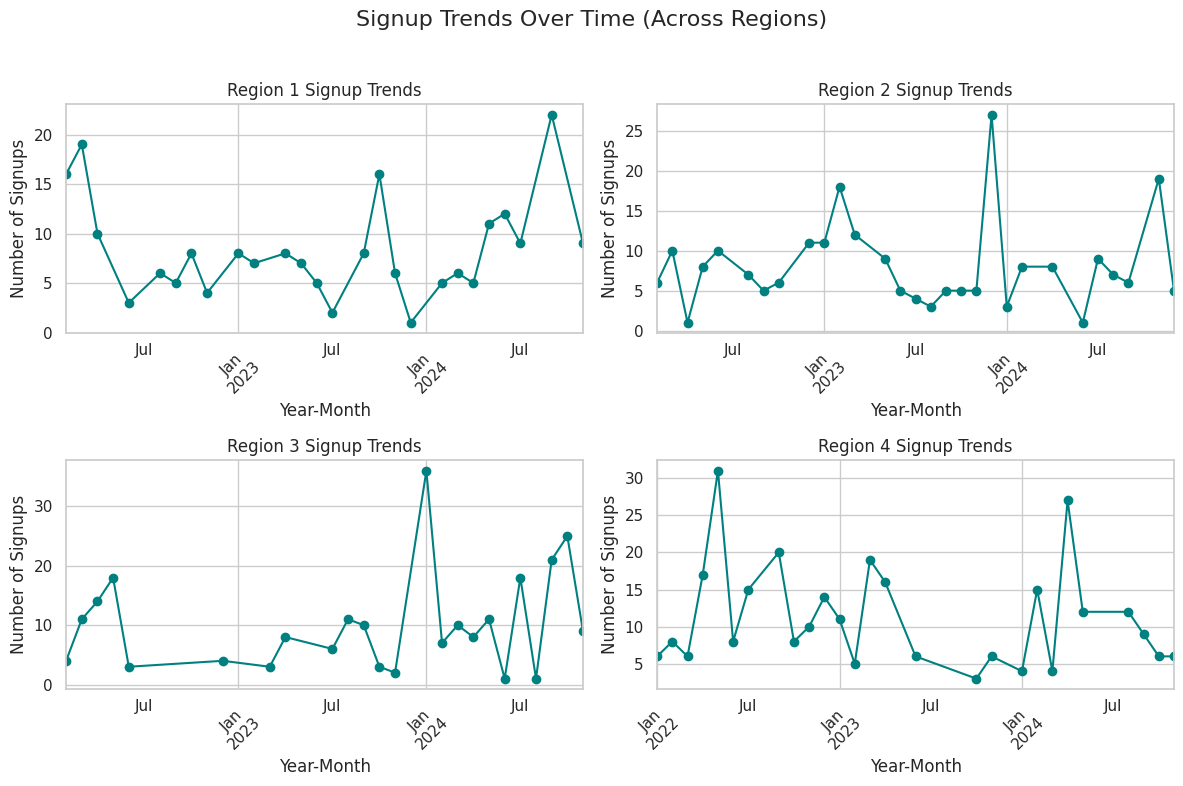

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_signup_trends(dfs):
    # Set up a 2x2 subplot grid
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('Signup Trends Over Time (Across Regions)', fontsize=16)

    # Iterate over the DataFrames and their respective subplot axes
    for idx, (df, ax) in enumerate(zip(dfs, axs.flatten())):
        # Convert SignupDate to datetime
        df['SignupDate'] = pd.to_datetime(df['SignupDate'])

        # Extract Year-Month for grouping
        df['SignupYearMonth'] = df['SignupDate'].dt.to_period('M')

        # Compute signup trends
        signup_trend = df['SignupYearMonth'].value_counts().sort_index()

        # Plot signup trend for the current DataFrame
        signup_trend.plot(kind='line', marker='o', color='teal', ax=ax)
        ax.set_title(f'Region {idx + 1} Signup Trends')
        ax.set_xlabel('Year-Month')
        ax.set_ylabel('Number of Signups')
        ax.tick_params(axis='x', rotation=45)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example usage with four DataFrames (replace with your actual data)
dfs = [df1, df2, df3, df4]  # Replace with the actual DataFrame names
plot_signup_trends(dfs)


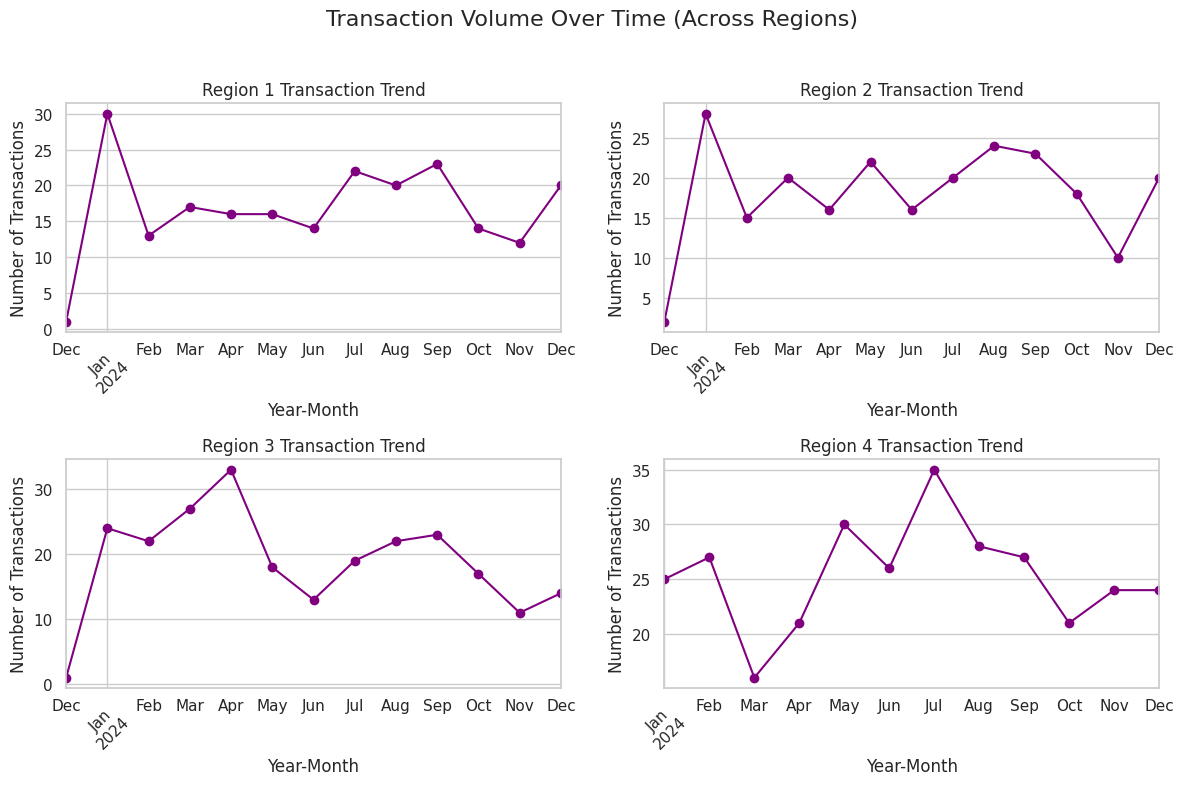

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_transaction_trends(dfs):
    # Set up a 2x2 subplot grid
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('Transaction Volume Over Time (Across Regions)', fontsize=16)

    # Iterate over the DataFrames and their respective subplot axes
    for idx, (df, ax) in enumerate(zip(dfs, axs.flatten())):
        # Convert TransactionDate to datetime
        df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

        # Extract Year-Month for grouping
        transaction_trend = df['TransactionDate'].dt.to_period('M').value_counts().sort_index()

        # Plot transaction trend for the current DataFrame
        transaction_trend.plot(kind='line', marker='o', color='purple', ax=ax)
        ax.set_title(f'Region {idx + 1} Transaction Trend')
        ax.set_xlabel('Year-Month')
        ax.set_ylabel('Number of Transactions')
        ax.tick_params(axis='x', rotation=45)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example usage with four DataFrames (replace with your actual data)
dfs = [df1, df2, df3, df4]  # Replace with the actual DataFrame names
plot_transaction_trends(dfs)


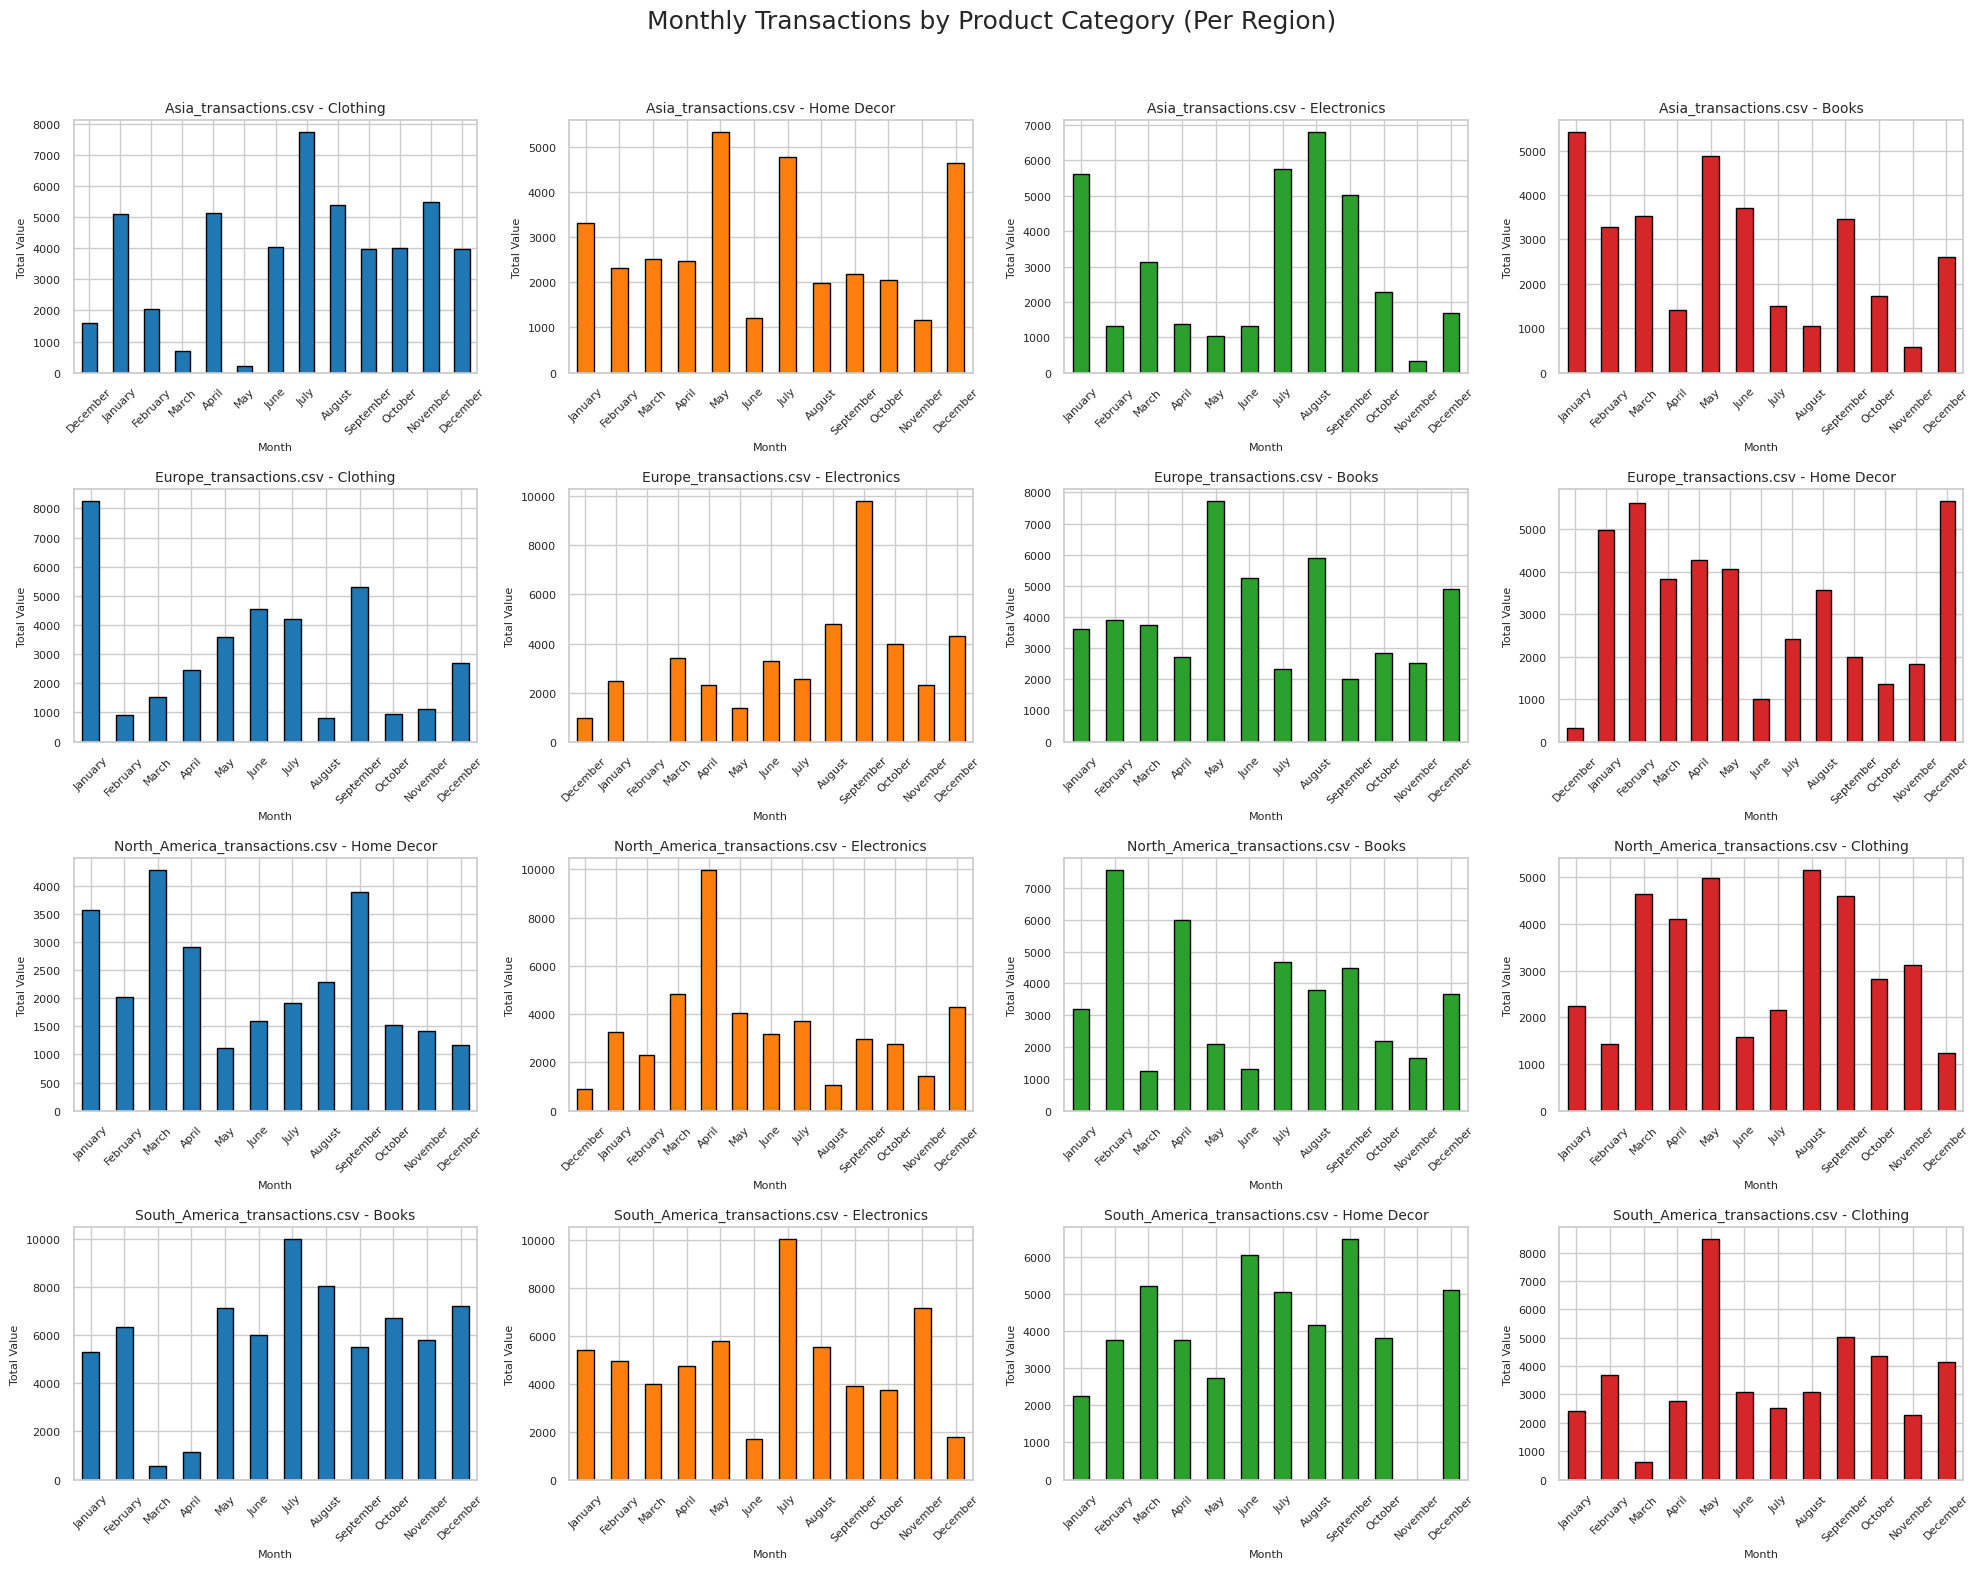

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def analyze_transactions_separately(file_paths):
    # Color palette for categories
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Set up a 4x4 subplot
    fig, axs = plt.subplots(4, 4, figsize=(20, 16))
    fig.suptitle('Monthly Transactions by Product Category (Per Region)', fontsize=18)

    # Iterate through files and plot each file's categories
    for file_idx, file_path in enumerate(file_paths):
        # Read data from the file
        df = pd.read_csv(file_path)

        # Convert TransactionDate to datetime
        df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

        # Get unique categories
        categories = df['Category'].unique()

        for cat_idx, category in enumerate(categories):
            # Filter data for the current category
            category_data = df[df['Category'] == category]

            # Group by month
            monthly_transactions = category_data.groupby(pd.Grouper(key='TransactionDate', freq='M'))['TotalValue'].sum()

            # Rename index to month names
            monthly_transactions.index = monthly_transactions.index.strftime('%B')

            # Get subplot axes
            ax = axs[file_idx, cat_idx]

            # Plot data
            monthly_transactions.plot(kind='bar', ax=ax, color=colors[cat_idx], edgecolor='black')
            ax.set_title(f'{os.path.basename(file_path)} - {category}', fontsize=10)
            ax.set_xlabel('Month', fontsize=8)
            ax.set_ylabel('Total Value', fontsize=8)
            ax.tick_params(axis='x', rotation=45, labelsize=8)
            ax.tick_params(axis='y', labelsize=8)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example usage - replace with your actual file paths
file_paths = [
    '/content/Asia_transactions.csv',
    '/content/Europe_transactions.csv',
    '/content/North_America_transactions.csv',
    '/content/South_America_transactions.csv'
]

analyze_transactions_separately(file_paths)


In [98]:
import pandas as pd
df = df_final

# Load your data (replace with the actual path to your dataset)
# df = pd.read_csv("your_dataset.csv")

# Create a binary pivot table: Transactions (rows) x Products (columns)
pivot_table = df.pivot_table(index='TransactionID', columns='ProductName', aggfunc='size', fill_value=0)

# Calculate the correlation matrix for products
correlation_matrix = pivot_table.corr()

# Display highly correlated product pairs
threshold = 0.5  # Adjust this threshold for strong correlations
high_correlations = []

for product1 in correlation_matrix.columns:
    for product2 in correlation_matrix.columns:
        if product1 != product2 and correlation_matrix.loc[product1, product2] > threshold:
            high_correlations.append((product1, product2, correlation_matrix.loc[product1, product2]))

# Print highly correlated pairs
for product1, product2, correlation in high_correlations:
    print(f"{product1} and {product2} have a correlation of {correlation:.2f}")


In [99]:
# Set the correlation threshold
threshold = -0.5

# Find product pairs with correlation greater than the threshold
high_correlations = []

for product1 in correlation_matrix.columns:
    for product2 in correlation_matrix.columns:
        if product1 != product2 and correlation_matrix.loc[product1, product2] > threshold:
            high_correlations.append((product1, product2, correlation_matrix.loc[product1, product2]))

# Convert to DataFrame for easier readability
high_correlations_df = pd.DataFrame(high_correlations, columns=["Product1", "Product2", "Correlation"])

# Sort by correlation
high_correlations_df = high_correlations_df.sort_values(by="Correlation", ascending=False)

# Display the results
print(high_correlations_df)

                         Product1                     Product2  Correlation
3298             SoundWave Laptop             SoundWave Jacket    -0.005952
3169             SoundWave Jacket             SoundWave Laptop    -0.005952
2257  HomeSense Bluetooth Speaker             SoundWave Jacket    -0.005952
3154             SoundWave Jacket  HomeSense Bluetooth Speaker    -0.005952
3138             SoundWave Jacket                BookWorld Rug    -0.005952
...                           ...                          ...          ...
398                ActiveWear Rug        ActiveWear Smartwatch    -0.035276
854           BookWorld Biography        ActiveWear Smartwatch    -0.035898
597         ActiveWear Smartwatch          BookWorld Biography    -0.035898
3064         SoundWave Headphones        ActiveWear Smartwatch    -0.040569
631         ActiveWear Smartwatch         SoundWave Headphones    -0.040569

[4290 rows x 3 columns]


In [100]:
# Step 1: Unstack the correlation matrix to get pairwise correlations
correlation_pairs = correlation_matrix.unstack()

# Step 2: Convert the series into a DataFrame and reset index
# Rename the index and columns to avoid conflicts
correlation_pairs.index.names = ['RowProduct', 'ColProduct']  # Rename index levels
correlation_df = correlation_pairs.reset_index()  # Reset index to get a DataFrame

# Step 3: Rename columns explicitly for clarity
correlation_df.columns = ['Product1', 'Product2', 'Correlation']

# Step 4: Remove self-correlations and filter for strong correlations
threshold = 0.5  # Adjust the threshold
strong_positive_correlations = correlation_df[
    (correlation_df['Correlation'] > threshold) & (correlation_df['Product1'] != correlation_df['Product2'])
]

strong_negative_correlations = correlation_df[
    (correlation_df['Correlation'] < -threshold) & (correlation_df['Product1'] != correlation_df['Product2'])
]

# Step 5: Display results
print("Strong Positive Correlations:")
print(strong_positive_correlations)

print("\nStrong Negative Correlations:")
print(strong_negative_correlations)


Strong Positive Correlations:
Empty DataFrame
Columns: [Product1, Product2, Correlation]
Index: []

Strong Negative Correlations:
Empty DataFrame
Columns: [Product1, Product2, Correlation]
Index: []


In [105]:
import pandas as pd

# Function to calculate average spending with validation
def calculate_average_spending(df):
    # Check if required columns are present
    required_columns = {'CustomerID.1', 'Region', 'TotalValue'}
    if not required_columns.issubset(df.columns):
        raise ValueError(f"DataFrame is missing required columns: {required_columns - set(df.columns)}")

    # Group by CustomerID and Region
    customer_spending = df.groupby(['CustomerID.1', 'Region'])['TotalValue'].sum().reset_index()

    # Calculate average spending per customer in each region
    average_spending_per_region = customer_spending.groupby('Region')['TotalValue'].mean().reset_index()

    # Rename columns for clarity
    average_spending_per_region.columns = ['Region', 'AverageSpending']

    return average_spending_per_region

# List of DataFrames
dataframes = [df1, df2, df3, df4]

# Process each DataFrame
results = []
for i, df in enumerate(dataframes, 1):
    print(f"Processing df{i}...")
    try:
        result = calculate_average_spending(df)
        results.append(result)
        print(result)
    except ValueError as e:
        print(f"Skipping df{i}: {e}")
    print("-" * 40)


Processing df1...
  Region  AverageSpending
0   Asia      3456.249318
----------------------------------------
Processing df2...
   Region  AverageSpending
0  Europe        3325.0926
----------------------------------------
Processing df3...
          Region  AverageSpending
0  North America       3311.16087
----------------------------------------
Processing df4...
          Region  AverageSpending
0  South America          3717.84
----------------------------------------


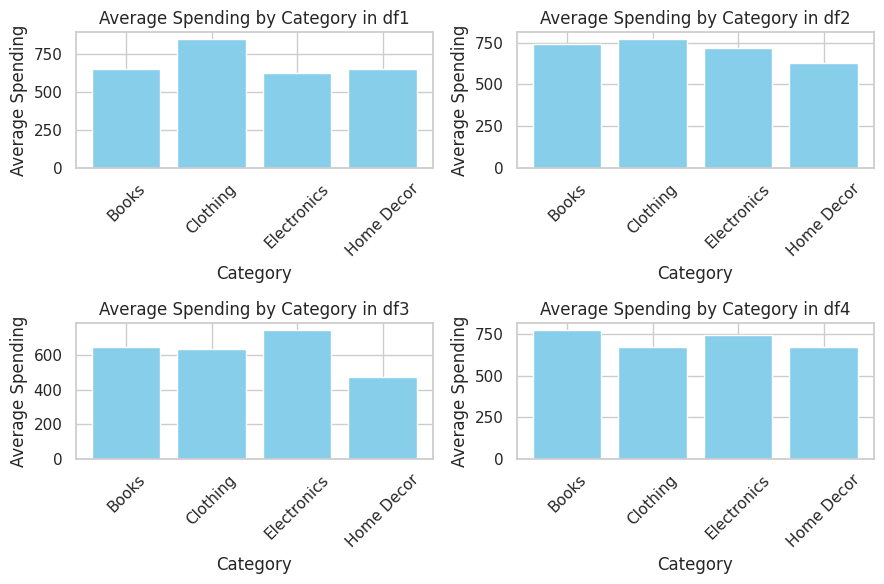

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate average spending for each category in a DataFrame
def calculate_average_spending(df):
    required_columns = {'Category', 'TotalValue'}
    if not required_columns.issubset(df.columns):
        raise ValueError(f"DataFrame is missing required columns: {required_columns - set(df.columns)}")

    # Group by Category
    average_spending_per_category = df.groupby('Category')['TotalValue'].mean().reset_index()
    average_spending_per_category.columns = ['Category', 'AverageSpending']
    return average_spending_per_category

# List of DataFrames
dataframes = [df1, df2, df3, df4]

# Create a 2x2 grid for plots
fig, axes = plt.subplots(2, 2, figsize=(9, 6))
axes = axes.flatten()  # Flatten the 2D array to easily iterate

# Process each DataFrame and plot
for i, (df, ax) in enumerate(zip(dataframes, axes), 1):
    try:
        # Calculate average spending
        result = calculate_average_spending(df)

        # Plotting
        ax.bar(result['Category'], result['AverageSpending'], color='skyblue')
        ax.set_xlabel('Category')
        ax.set_ylabel('Average Spending')
        ax.set_title(f'Average Spending by Category in df{i}')
        ax.tick_params(axis='x', rotation=45)
    except ValueError as e:
        ax.set_title(f"Skipping df{i}: {e}")
        ax.axis('off')  # Turn off the plot for skipped DataFrames

# Adjust layout
plt.tight_layout()
plt.show()


In [114]:
pip install pyspark


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
from pyspark.sql import SparkSession
from pyspark.ml.fpm import FPGrowth

# Step 1: Create a Spark session
spark = SparkSession.builder.appName("Market Basket Analysis").getOrCreate()

# Step 2: Prepare the data
# Assuming your dataset `df` has 'TransactionID' and 'ProductName' columns
transactions = df.groupby('TransactionID')['ProductName'].apply(list).reset_index()

# Convert the Pandas DataFrame to a PySpark DataFrame
spark_transactions = spark.createDataFrame(transactions.rename(columns={'ProductName': 'items'}))

# Step 3: Apply FPGrowth
fp_growth = FPGrowth(itemsCol="items", minSupport=0.001, minConfidence=0.01)
model = fp_growth.fit(spark_transactions)

# Step 4: Extract frequent itemsets
frequent_itemsets = model.freqItemsets
print("Frequent Itemsets:")
frequent_itemsets.show(truncate=False)

# Step 5: Extract association rules
association_rules = model.associationRules
print("\nAssociation Rules:")
association_rules.show(truncate=False)

# Optional: Save results to CSV
frequent_itemsets.toPandas().to_csv("frequent_itemsets.csv", index=False)
association_rules.toPandas().to_csv("association_rules.csv", index=False)

# Step 6: Stop the Spark session
spark.stop()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/pyspark/sql/pandas/conversion.py:485: DeprecationWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if should_localize and is_datetime64tz_dtype(s.dtype) and s.dt.tz is not None:
/usr/local/lib/python3.11/dist-packages/pyspark/sql/pandas/conversion.py:485: DeprecationWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if should_localize and is_datetime64tz_dtype(s.dtype) and s.dt.tz is not None:


Frequent Itemsets:
+-----------------------------+----+
|items                        |freq|
+-----------------------------+----+
|[ActiveWear Wall Art]        |2   |
|[ActiveWear Headphones]      |4   |
|[ComfortLiving Headphones]   |1   |
|[ComfortLiving Mystery Book] |3   |
|[SoundWave Smartwatch]       |7   |
|[BookWorld Biography]        |5   |
|[SoundWave Textbook]         |2   |
|[HomeSense Bluetooth Speaker]|3   |
|[SoundWave Cookbook]         |11  |
|[HomeSense Sweater]          |6   |
|[TechPro Novel]              |7   |
|[BookWorld Jacket]           |3   |
|[ComfortLiving Rug]          |1   |
|[BookWorld Rug]              |2   |
|[HomeSense T-Shirt]          |3   |
|[HomeSense Desk Lamp]        |10  |
|[HomeSense Novel]            |6   |
|[ComfortLiving Biography]    |6   |
|[ComfortLiving Sweater]      |2   |
|[HomeSense Rug]              |4   |
+-----------------------------+----+
only showing top 20 rows


Association Rules:
+----------+----------+----------+----+-------+

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


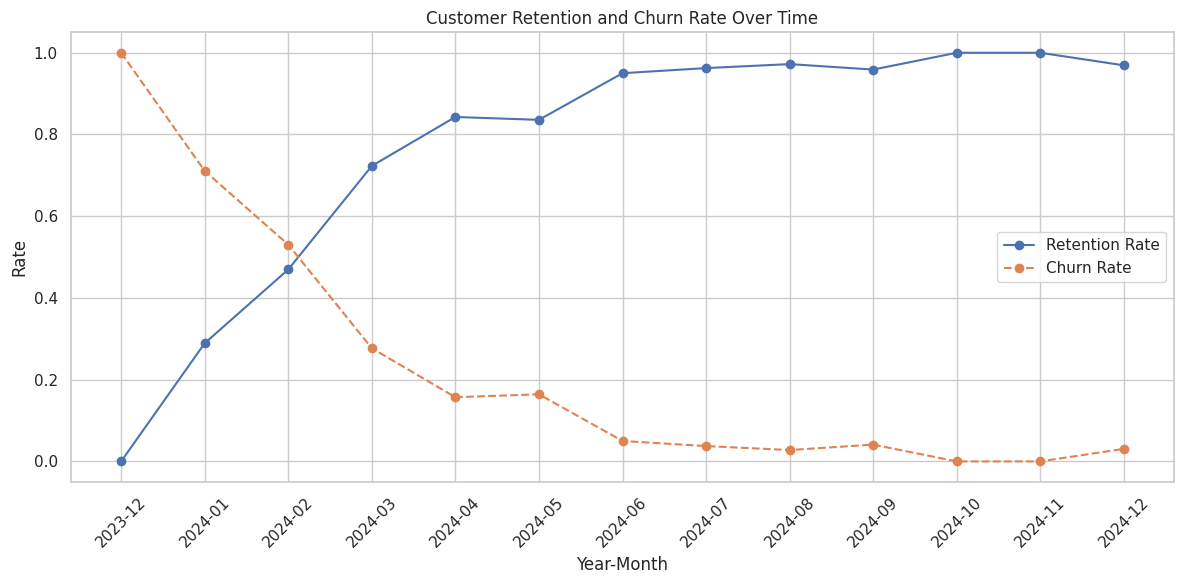

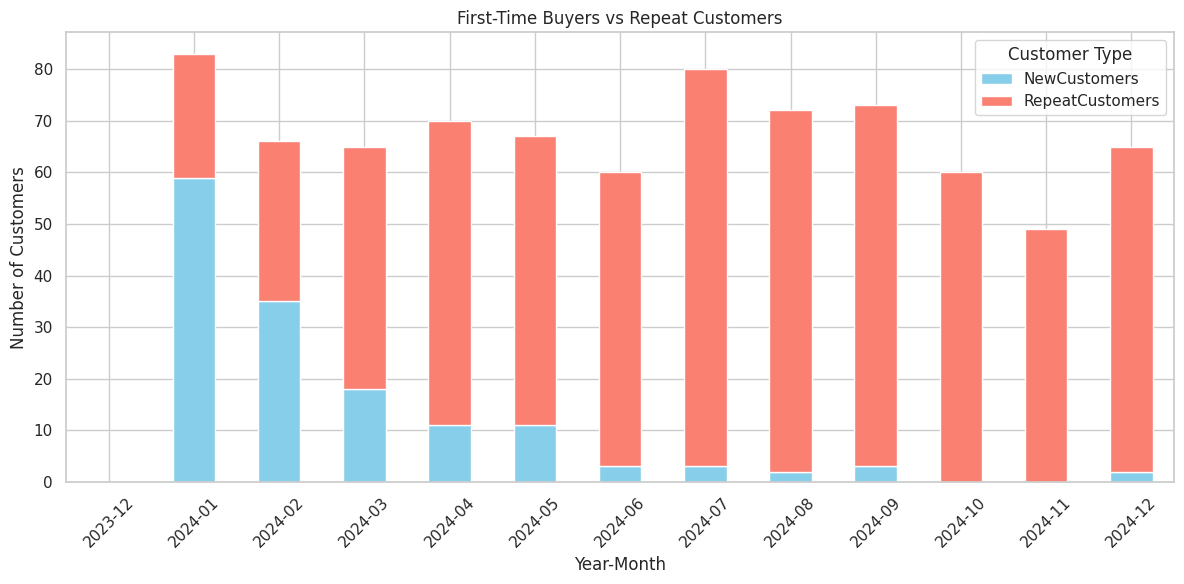

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'data.csv' with your file path)
# Assuming columns: 'CustomerID.1', 'TransactionDate', 'TotalValue'
df_final = pd.read_csv('/content/final.csv', parse_dates=['TransactionDate'])

# Step 1: Sort data and prepare necessary columns
df_final = df_final.sort_values(by=['CustomerID.1', 'TransactionDate'])
df_final['YearMonth'] = df_final['TransactionDate'].dt.to_period('M')

# Step 2: Identify first-time purchases
df_final['FirstPurchaseDate'] = df_final.groupby('CustomerID.1')['TransactionDate'].transform('min')
df_final['IsRepeatCustomer'] = df_final['TransactionDate'] > df_final['FirstPurchaseDate']

# Step 3: Analyze retention trends
monthly_customers = df_final.groupby('YearMonth')['CustomerID.1'].nunique()
repeat_customers = df_final[df_final['IsRepeatCustomer']].groupby('YearMonth')['CustomerID.1'].nunique()
new_customers = monthly_customers - repeat_customers

# Step 4: Calculate churn rate and retention rate
retention_rate = (repeat_customers / monthly_customers).fillna(0)
churn_rate = 1 - retention_rate

# Step 5: Plot retention and churn rates
plt.figure(figsize=(12, 6))
plt.plot(retention_rate.index.astype(str), retention_rate.values, label='Retention Rate', marker='o')
plt.plot(churn_rate.index.astype(str), churn_rate.values, label='Churn Rate', marker='o', linestyle='--')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Rate')
plt.title('Customer Retention and Churn Rate Over Time')
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Analyze first-time buyers vs repeat customers
monthly_new_vs_repeat = pd.DataFrame({
    'NewCustomers': new_customers,
    'RepeatCustomers': repeat_customers
}).fillna(0)

# Plotting first-time buyers vs repeat customers
monthly_new_vs_repeat.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])
plt.xlabel('Year-Month')
plt.ylabel('Number of Customers')
plt.title('First-Time Buyers vs Repeat Customers')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
monthly_new_vs_repeat.to_csv('customer_analysis.csv', index=True)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


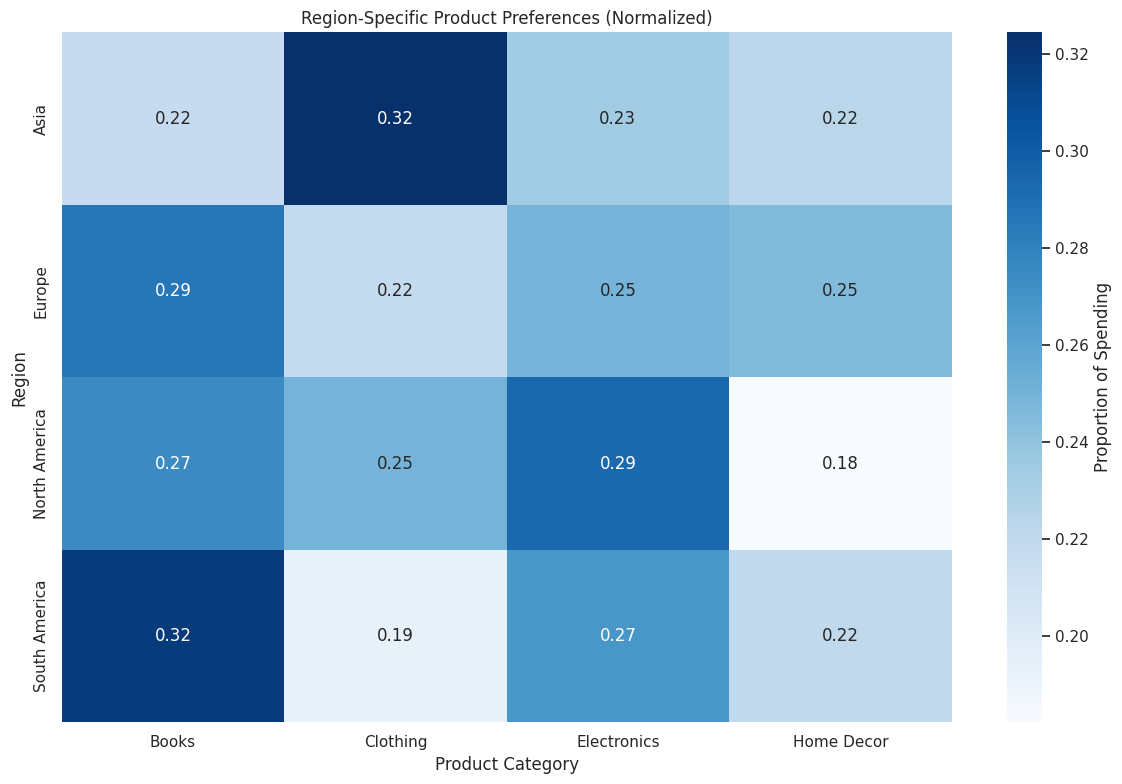

Top Product Categories by Region:
           Region     Category  TotalValue
1            Asia     Clothing    49353.09
2            Asia  Electronics    35658.15
3            Asia   Home Decor    33944.70
4          Europe        Books    47464.42
6          Europe  Electronics    41562.60
7          Europe   Home Decor    40892.02
10  North America  Electronics    44716.43
8   North America        Books    41811.99
9   North America     Clothing    38038.49
12  South America        Books    69752.03
14  South America  Electronics    58846.32
15  South America   Home Decor    48310.72


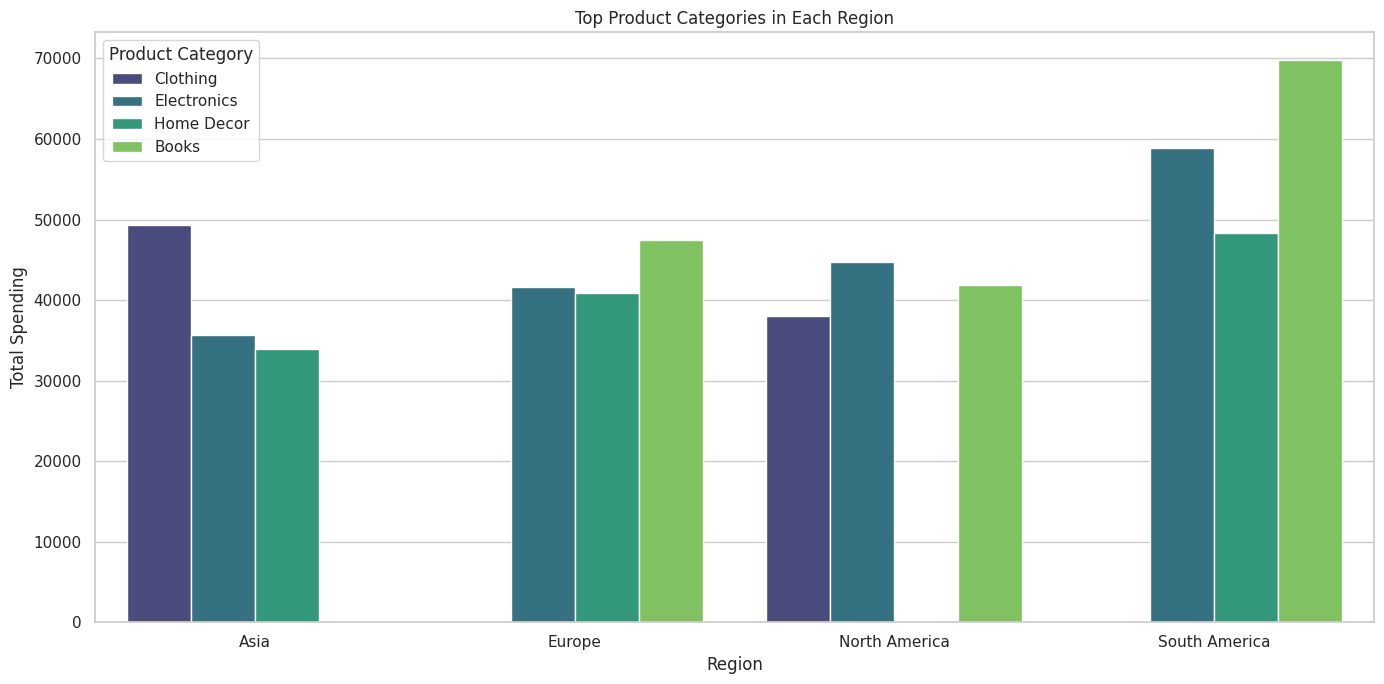

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace 'data.csv' with your actual file path)
# Assuming columns: 'Region', 'Category', 'TotalValue'
df_final = pd.read_csv('/content/final.csv')

# Step 1: Group data by Region and Category to calculate total spending
region_category_sales = df_final.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()

# Step 2: Pivot the data for better visualization
pivot_table = region_category_sales.pivot(index='Region', columns='Category', values='TotalValue').fillna(0)

# Step 3: Normalize data (optional, to see proportional preferences within each region)
pivot_normalized = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Step 4: Plot heatmap for product preferences by region
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_normalized, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Proportion of Spending'})
plt.title("Region-Specific Product Preferences (Normalized)")
plt.xlabel("Product Category")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# Step 5: Compare top-performing categories in each region
top_categories_by_region = region_category_sales.sort_values(['Region', 'TotalValue'], ascending=[True, False]) \
                                                .groupby('Region').head(3)

print("Top Product Categories by Region:")
print(top_categories_by_region)

# Step 6: Plot bar chart for top categories in each region
plt.figure(figsize=(14, 7))
sns.barplot(data=top_categories_by_region, x='Region', y='TotalValue', hue='Category', palette='viridis')
plt.title("Top Product Categories in Each Region")
plt.xlabel("Region")
plt.ylabel("Total Spending")
plt.legend(title="Product Category")
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
region_category_sales.to_csv('region_category_sales.csv', index=False)
top_categories_by_region.to_csv('top_categories_by_region.csv', index=False)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Customer Lifetime Value Data:
    CustomerID.1        CLV
0          C0001  13.300775
1          C0002   7.129369
2          C0003   7.054057
3          C0004  22.043218
4          C0005   6.525476
..           ...        ...
194        C0196   8.918213
195        C0197   9.266867
196        C0198   0.064145
197        C0199   1.880227
198        C0200  14.871649

[199 rows x 2 columns]


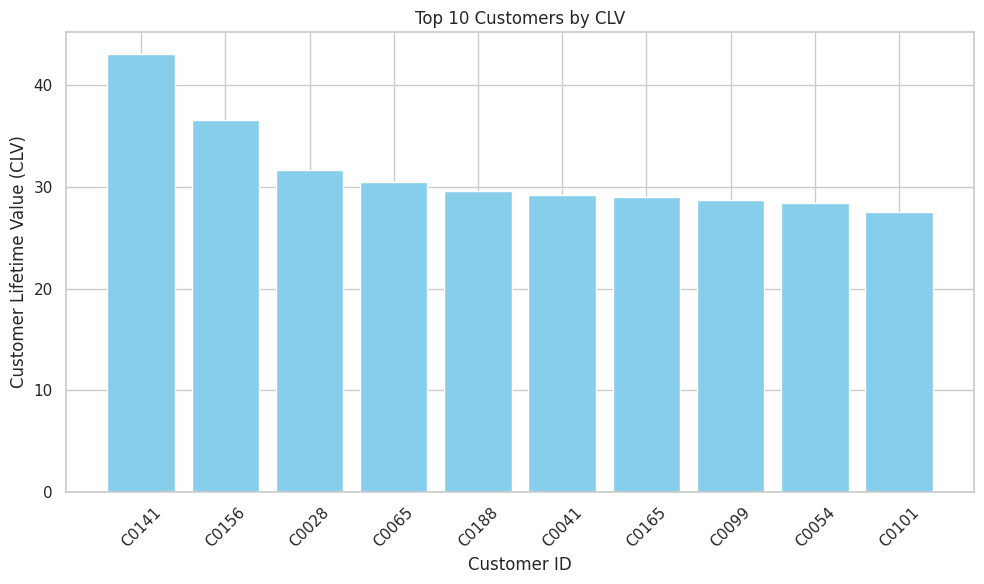

In [124]:
import pandas as pd

# Load the dataset (replace 'data.csv' with your dataset file path)
# Assumes columns: 'CustomerID.1', 'TransactionID', 'TransactionDate', 'TotalValue'
df_final = pd.read_csv("/content/final.csv")

# Step 1: Preprocess the data
# Convert 'TransactionDate' to datetime
df_final['TransactionDate'] = pd.to_datetime(df_final['TransactionDate'])

# Calculate metrics for CLV

# Step 2: Average Transaction Value (ATV)
atv = df_final.groupby('CustomerID.1')['TotalValue'].mean().reset_index()
atv.columns = ['CustomerID.1', 'AverageTransactionValue']

# Step 3: Purchase Frequency (PF)
total_transactions = df_final.groupby('CustomerID.1')['TransactionID'].count().reset_index()
total_transactions.columns = ['CustomerID.1', 'TotalTransactions']

# Calculate total unique customers for frequency calculation
total_customers = df_final['CustomerID.1'].nunique()

# Purchase frequency: Total transactions / Total customers
pf = total_transactions.copy()
pf['PurchaseFrequency'] = pf['TotalTransactions'] / total_customers

# Step 4: Customer Lifespan
# Find the first and last transaction dates for each customer
customer_lifespan = df_final.groupby('CustomerID.1').agg(
    FirstPurchase=('TransactionDate', 'min'),
    LastPurchase=('TransactionDate', 'max')
).reset_index()

# Calculate lifespan in days
customer_lifespan['LifespanDays'] = (customer_lifespan['LastPurchase'] - customer_lifespan['FirstPurchase']).dt.days
customer_lifespan['LifespanYears'] = customer_lifespan['LifespanDays'] / 365

# Step 5: Merge metrics into a single DataFrame
clv_data = atv.merge(pf, on='CustomerID.1').merge(customer_lifespan, on='CustomerID.1')

# Step 6: Calculate CLV
# CLV = AverageTransactionValue * PurchaseFrequency * LifespanYears
clv_data['CLV'] = (
    clv_data['AverageTransactionValue'] * clv_data['PurchaseFrequency'] * clv_data['LifespanYears']
)

# Step 7: Output and visualization
print("Customer Lifetime Value Data:")
print(clv_data[['CustomerID.1', 'CLV']])

# Optional: Save results to CSV
clv_data.to_csv("customer_lifetime_value.csv", index=False)

# Step 8: Visualization
import matplotlib.pyplot as plt

# Plot Top 10 Customers with Highest CLV
top_customers = clv_data[['CustomerID.1', 'CLV']].sort_values(by='CLV', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_customers['CustomerID.1'].astype(str), top_customers['CLV'], color='skyblue')
plt.xlabel('Customer ID')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.title('Top 10 Customers by CLV')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
